C
C


<AxesSubplot:title={'center':'moon'}, xlabel='x', ylabel='y'>

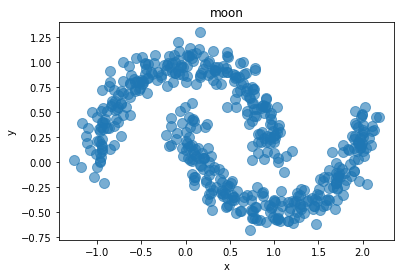

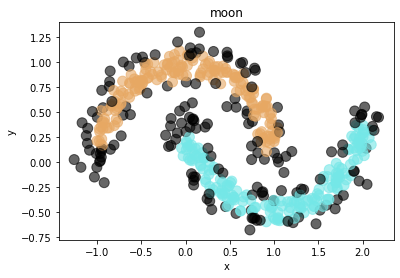

In [25]:
import numpy as np
import pandas as pd
import random
from sklearn import datasets
import matplotlib.pyplot as plt

%matplotlib inline

#随机生成颜色
def randomcolor():
    colorArr=['1','2','3','4','5','6','7','8','9','A','B','C','D','E','F']
    color=""
    for i in range(6):
        color+=colorArr[random.randint(0,14)]
    return '#'+color

# 生成数据集
#'_' 表示生成数据的类别标签0或1(不需要，需要删掉)
dataset,_ = datasets.make_moons(500, noise=0.1, random_state=1)
df = pd.DataFrame(dataset, columns=['x','y'])
df.plot.scatter('x', 'y', s=100, alpha=0.6, title='moon')

# 初始化邻域参数
r = 0.2
minpts = 20

# 建立邻域字典，搜索所有核心元素
#矩阵转列表，加上样本的序号
dataset = dataset.tolist()
for i in range(len(dataset)):
    dataset[i] = [i]+dataset[i]
#给df添加颜色属性列
df['color'] = 'k'

#初始化字典 (建立字典 <key,value> 邻域集合值 ，key用序号代替)字典表示，以某个点画圆，在园内的点的序号列表  <某点序号, 在以这个点为圆心圆内的点的序号>
N_dict = {}
for i in dataset:
    #临时存储邻域
    n_tmp = []
    for j in dataset:
        #距离使用欧式距离
        dist = ((i[1]-j[1])**2 + (i[2]-j[2])**2 )**0.5
        if i[0] != j[0] and dist <= r:
            n_tmp.append(j[0])
    N_dict[i[0]] = n_tmp
#初始化核心元素集合 一个存储核心点 序号 的列表
cores = []
for i in range(500):
    if len(N_dict[i]) >= minpts:
        cores.append(i)

# 聚类（以任意核心对象为出发点，找出由其密度可达的样本生成聚类簇，直到所有核心对象被访问过）
while cores != []:
    #在核心点里随机找一个作为簇的开始
    visit = random.sample(cores, 1)
    #随机产生该簇颜色
    clr = randomcolor()
    print('C')
    while visit != []:
        master = visit.pop(0)
        for i in N_dict[master]:
            if i in cores and i not in visit:
                    visit.append(i) 
                    df['color'][i] = clr
        #从核心点中删除该序号 (出的错误是因为，某点的圆内的点可能不是核心点就退出了上面的for循环，所以要加个if 判断)
        if master in cores:
            cores.remove(master)
df.plot.scatter('x', 'y', color=df['color'], s=100, alpha=0.6, title='moon')
    